### machine learning final project
    author:孔云飞
    date:2020/6/7
    problem source:https://www.kaggle.com/roche-data-science-coalition/uncover/tasks ,Which populations assessed should stay home and which should see an HCP?

In [1]:
# data processing tools
import pandas as pd
import numpy as np
# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('.\\uncover\\coders_against_covid\\crowd-sourced-covid-19-testing-locations.csv')
train_data = df.sample(frac=0.75, random_state=0,axis=0)
test_data = df[~df.index.isin(train_data.index)]
#train_data.to_csv('train_data.csv', index =False)
#test_data.to_csv('test_data.csv', index=False)

#train_data = pd.read_csv('train_data.csv')
#test_data = pd.read_csv('test_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 3201 to 3852
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   location_id                                           3119 non-null   object 
 1   is_verified                                           3119 non-null   object 
 2   is_hidden                                             3119 non-null   object 
 3   is_location_screening_patients                        3091 non-null   object 
 4   is_location_collecting_specimens                      3115 non-null   object 
 5   location_name                                         3119 non-null   object 
 6   location_address_street                               3119 non-null   object 
 7   location_address_locality                             3119 non-null   object 
 8   location_address_region                               3

In this dataset，I think we can judge a person should stay home or see an HCP by **is verified** or not。

In [2]:
train_data.head(7)

,location_id,is_verified,is_hidden,is_location_screening_patients,is_location_collecting_specimens,location_name,location_address_street,location_address_locality,location_address_region,location_address_postal_code,...,is_location_only_testing_patients_that_meet_criteria,is_location_by_appointment_only,location_contact_phone_appointments,location_contact_url_appointments,location_specific_testing_criteria,additional_information_for_patients,data_source,is_ready_for_prod,location_address_district,geometry
3201,6ca2fc6d-7e78-4065-8906-ef610f3bfc3c,f,f,t,f,Olivet Health Department,140 Euclid Street,Olivet,South Dakota,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-97.6746926 43.2410819)
2172,4ec75b5d-b8fe-48d8-9f7c-73400ecd16ad,f,f,t,f,Montana Health Department,220 West Lamme Street,Bozeman,Montana,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-111.04209 45.681274)
3934,a8ee7594-6166-41b0-a8a7-119b1c0973ce,t,f,t,f,UW Medical Center - Northwest,1550 N 115th St.,Seattle,WA,98133.0,...,t,t,NaN,NaN,https://www.doh.wa.gov/Emergencies/NovelCorona...,https://www.doh.wa.gov/Emergencies/Coronavirus,provider website,NaN,NaN,POINT (-122.33911 47.712307)
3607,13ca33b3-8287-44c0-a226-7df76a6a303f,f,f,t,f,Health Officer - Concord,385 West Main Street,Concord,Vermont,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-71.69618 44.461197)
2954,3aaff55d-3571-4dbf-9439-0353426c40e5,f,f,t,f,Oklahoma State Department of Health,1000 Northeast 10th Street,Oklahoma,Oklahoma,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-97.48937 35.47799)
1999,cabfe6cb-6872-4f17-9827-a815bc90a6c1,f,f,t,f,Mississippi State Health Department,901 Union Road,Tylertown,Mississippi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-90.13838 31.130804)
189,d8af4915-9405-4b53-b9d5-ebb75d47e792,f,f,t,f,White County Health Department,112 Brantley Rd,Searcy,Arkansas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-91.73356 35.206802)


    drop useless data columns

In [3]:
train_data.drop(train_data.columns[[0,5,6,7,8,9,12,13,14,15,19,20,21,22,23,24,25,26]],axis=1,inplace=True)
train_data.head()

,is_verified,is_hidden,is_location_screening_patients,is_location_collecting_specimens,lat,lng,is_location_accepting_third_party_orders_for_testing,is_location_only_testing_patients_that_meet_criteria,is_location_by_appointment_only
3201,f,f,t,f,43.241082,-97.674693,NaN,NaN,NaN
2172,f,f,t,f,45.681274,-111.042090,NaN,NaN,NaN
3934,t,f,t,f,47.712307,-122.339110,f,t,t
3607,f,f,t,f,44.461197,-71.696180,NaN,NaN,NaN
2954,f,f,t,f,35.477990,-97.489370,NaN,NaN,NaN


    convert all 't' and 'f' into 1 and 0

In [4]:
train_data['is_verified'] = np.where(train_data['is_verified'] == 't', 1, 0)
train_data['is_hidden'] = np.where(train_data['is_hidden'] == 't', 1, 0)
train_data['is_location_screening_patients'] = np.where(train_data['is_location_screening_patients'] == 't', 1, 0)
train_data['is_location_collecting_specimens'] = np.where(train_data['is_location_collecting_specimens'] == 't', 1, 0)
train_data['is_location_accepting_third_party_orders_for_testing'] = np.where(train_data['is_location_accepting_third_party_orders_for_testing'] == 't', 1, 0)
train_data['is_location_only_testing_patients_that_meet_criteria'] = np.where(train_data['is_location_only_testing_patients_that_meet_criteria'] == 't', 1, 0)
train_data['is_location_by_appointment_only'] = np.where(train_data['is_location_by_appointment_only'] == 't', 1, 0)


Due to the propagation characteristics of covid-19, it's easy to find many cases will be confirmed **regionally**,so there're many verified cases in some specific areas.The following pics show some information about the conclusion.But those latitude('lat'), longitude('lng') infomation have no obvious correlation with is_verified cases by calculation.

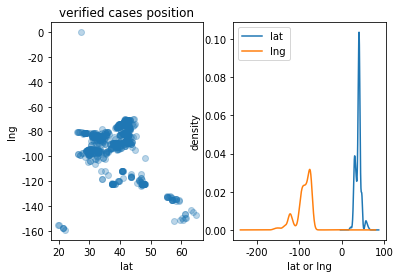

In [5]:
plt.subplot2grid((1, 2),(0, 0))
plt.title('verified cases position')
plt.scatter(x=train_data.lat[train_data.is_verified == 1], y=train_data.lng[train_data.is_verified == 1],alpha=0.3)
plt.xlabel('lat')
plt.ylabel('lng')

plt.subplot2grid((1,2), (0,1))
train_data.lat[train_data.is_verified == 1].plot(kind='kde')
train_data.lng[train_data.is_verified == 1].plot(kind='kde')
plt.xlabel('lat or lng')
plt.ylabel('density')
plt.legend(('lat','lng'), loc='best')

plt.show()

normalized 'lat' and 'lng' values into 0~1
show correlations

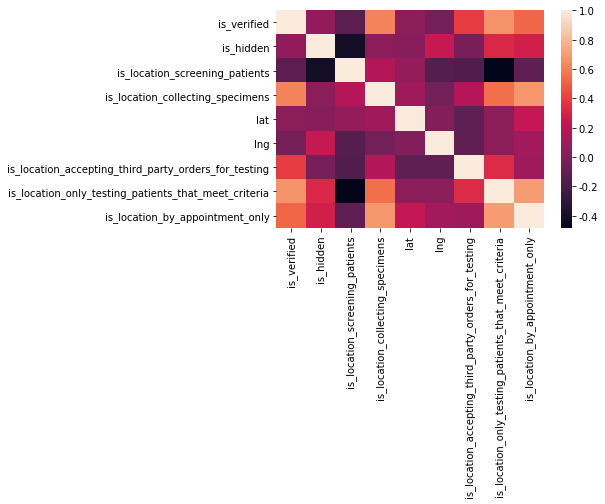

In [6]:
train_data['lat'] = (train_data['lat']-train_data['lat'].min())/(train_data['lat'].max()-train_data['lat'].min())
train_data['lng'] = (train_data['lng']-train_data['lng'].min())/(train_data['lng'].max()-train_data['lng'].min())
sns.heatmap(train_data.corr())
plt.show()

according to the figure,we can make a preliminary guess that 
**is_location_collecting_specimens,is_location_accepting_third_party_orders_for_testing, is_location_only_testing_patients_that_meet_criteria and is_location_by_appointment_only** have high correlation with is_verified

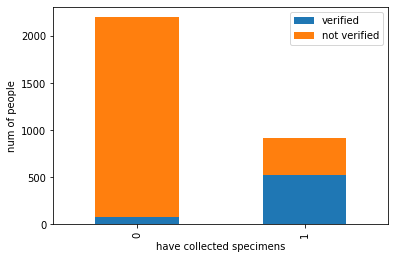

In [7]:
is_location_collecting_specimens1 = train_data.is_verified[train_data.is_location_collecting_specimens == 1].value_counts()
is_location_collecting_specimens0 = train_data.is_verified[train_data.is_location_collecting_specimens == 0].value_counts()
h_train_data = pd.DataFrame({'verified':is_location_collecting_specimens1, 'not verified':is_location_collecting_specimens0})
h_train_data.plot(kind='bar', stacked=True)
plt.ylabel('num of people')
plt.xlabel('have collected specimens')
plt.show()

Through the above analysis, we can see that if people are collected and sampled in a region, the proportion of people diagnosed will be significantly higher than those that have not been collected and sampled. Therefore, whether a region collects samples has a clear relationship with the diagnosis. We can use it as a feature value.

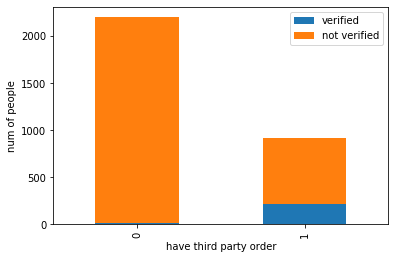

In [8]:
is_location_accepting_third_party_orders_for_testing1 = train_data.is_verified[train_data.is_location_accepting_third_party_orders_for_testing == 1].value_counts()
is_location_accepting_third_party_orders_for_testing0 =train_data.is_verified[train_data.is_location_accepting_third_party_orders_for_testing == 0].value_counts()
df1 = pd.DataFrame({'verified':is_location_accepting_third_party_orders_for_testing1, 'not verified':is_location_accepting_third_party_orders_for_testing0})
df1.plot(kind='bar', stacked=True)
plt.ylabel('num of people')
plt.xlabel('have third party order')
plt.show()

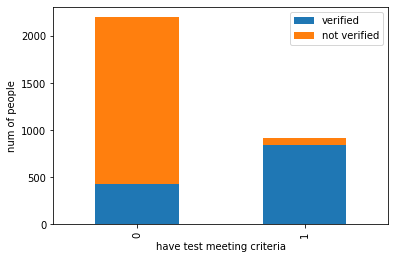

In [9]:
is_location_only_testing_patients_that_meet_criteria1 = train_data.is_verified[train_data.is_location_only_testing_patients_that_meet_criteria == 1].value_counts()
is_location_only_testing_patients_that_meet_criteria0 = train_data.is_verified[train_data.is_location_only_testing_patients_that_meet_criteria == 0].value_counts()
df2 = pd.DataFrame({'verified':is_location_only_testing_patients_that_meet_criteria1, 'not verified':is_location_only_testing_patients_that_meet_criteria0})
df2.plot(kind='bar', stacked=True)
plt.ylabel('num of people')
plt.xlabel('have test meeting criteria')
plt.show()

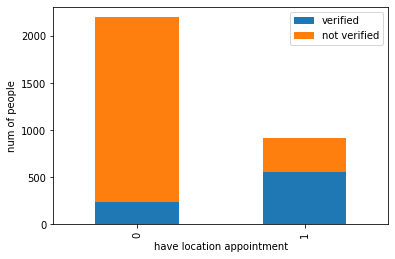

In [10]:
is_location_by_appointment_only1 = train_data.is_verified[train_data.is_location_by_appointment_only == 1].value_counts()
is_location_by_appointment_only0 = train_data.is_verified[train_data.is_location_by_appointment_only == 0].value_counts()
df3 = pd.DataFrame({'verified':is_location_by_appointment_only1, 'not verified':is_location_by_appointment_only0})
df3.plot(kind='bar', stacked=True)
plt.ylabel('num of people')
plt.xlabel('have location appointment')
plt.show()

In [11]:
from sklearn import linear_model

train_np = train_data.iloc[:,:].values

y = train_np[:, 0]
# X为特征值
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1,penalty='l2', tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [12]:
pd.set_option('mode.chained_assignment', None)
test_data.drop(test_data.columns[[0,5,6,7,8,9,12,13,14,15,19,20,21,22,23,24,25,26]],axis=1,inplace=True)
test_data['is_verified'] = np.where(test_data['is_verified'] == 't', 1, 0)
test_data['is_hidden'] = np.where(test_data['is_hidden'] == 't', 1, 0)
test_data['is_location_screening_patients'] = np.where(test_data['is_location_screening_patients'] == 't', 1, 0)
test_data['is_location_collecting_specimens'] = np.where(test_data['is_location_collecting_specimens'] == 't', 1, 0)
test_data['is_location_accepting_third_party_orders_for_testing'] = np.where(test_data['is_location_accepting_third_party_orders_for_testing'] == 't', 1, 0)
test_data['is_location_only_testing_patients_that_meet_criteria'] = np.where(test_data['is_location_only_testing_patients_that_meet_criteria'] == 't', 1, 0)
test_data['is_location_by_appointment_only'] = np.where(test_data['is_location_by_appointment_only'] == 't', 1, 0)
test_data['lat'] = (test_data['lat']-test_data['lat'].min())/(test_data['lat'].max()-test_data['lat'].min())
test_data['lng'] = (test_data['lng']-test_data['lng'].min())/(test_data['lng'].max()-test_data['lng'].min())

In [13]:
test_np = test_data.iloc[:,1:].values
result_np = test_data.iloc[:, 0].values
predictions = clf.predict(test_np)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(result_np, predictions))

0.8990384615384616


In [15]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        # plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("training sample num")
        plt.ylabel("score")
        # plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="score in train")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="score in cross-validation")
    
        plt.legend(loc="best")
        
        # plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

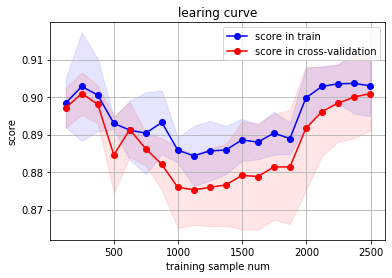

(0.9010845405061665, 0.020034534119309888)

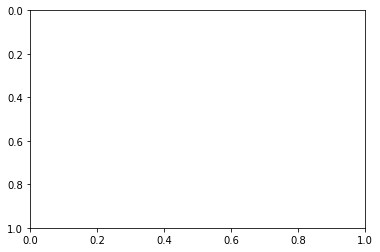

In [16]:
plot_learning_curve(clf, "learing curve", X, y)